In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [108]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [109]:
# Load the dataset
data = pd.read_csv("C:/Users/butle/Desktop/Oisin Trinity Msc/Operations analytics/bank_small.csv")

In [110]:
# Explore the dataset
print(data.head())  
print(data.info())  
print(data.describe())  

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #  

In [144]:
data.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [143]:
data["marital"].value_counts(normalize = True)

marital
married     0.618668
single      0.264543
divorced    0.116788
Name: proportion, dtype: float64

In [145]:
data.sort_values(by = "duration", ascending = False).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
568,59,unemployed,married,primary,no,0,no,no,cellular,30,jan,3025,2,-1,0,unknown,no
3673,36,entrepreneur,married,tertiary,no,3057,no,no,unknown,16,jun,2769,4,-1,0,unknown,yes
4123,47,blue-collar,divorced,primary,no,126,yes,no,unknown,3,jun,2456,2,-1,0,unknown,yes
980,43,management,divorced,tertiary,no,388,yes,no,unknown,8,may,2087,2,-1,0,unknown,yes
3853,54,technician,married,secondary,no,-315,no,yes,cellular,10,jul,2029,1,-1,0,unknown,yes


In [148]:
pd.crosstab(data["y"], data["marital"])

marital,divorced,married,single
y,,,
no,451,2520,1029
yes,77,277,167


In [149]:
pd.crosstab(data["y"],
            data["marital"],
            normalize = 'index')

marital,divorced,married,single
y,,,
no,0.112750,0.63000,0.257250
yes,0.147793,0.53167,0.320537


In [111]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [112]:
# Define preprocessing steps
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [113]:
bank_client = data.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,balance,housing
0,30,unemployed,married,primary,no,1787,no
1,33,services,married,secondary,no,4789,yes
2,35,management,single,tertiary,no,1350,yes
3,30,management,married,tertiary,no,1476,yes
4,59,blue-collar,married,secondary,no,0,yes


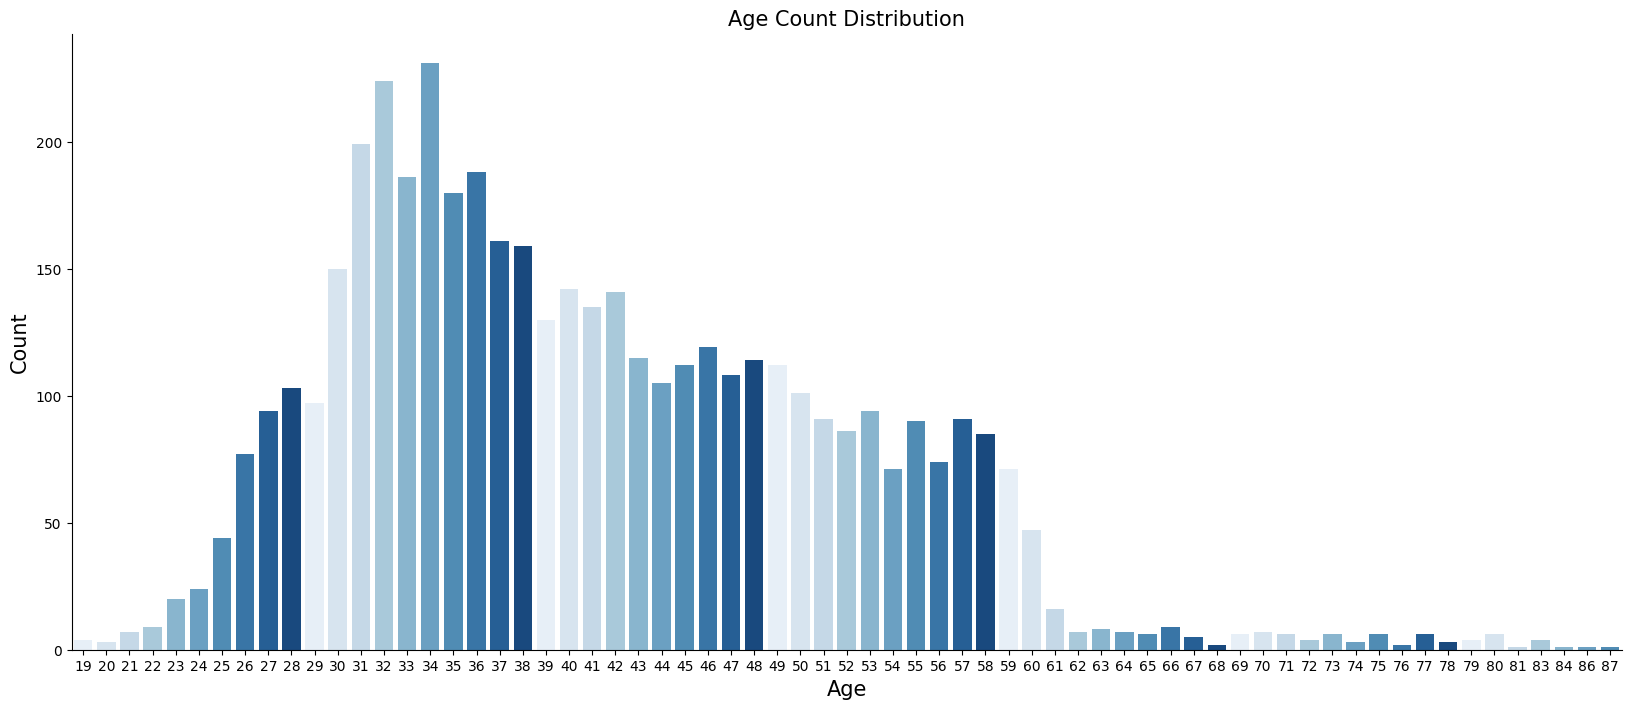

In [114]:
colors = sns.color_palette("Blues", 10)

# Create the count plot
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='age', data=bank_client, palette=colors)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

# Show the plot
plt.show()

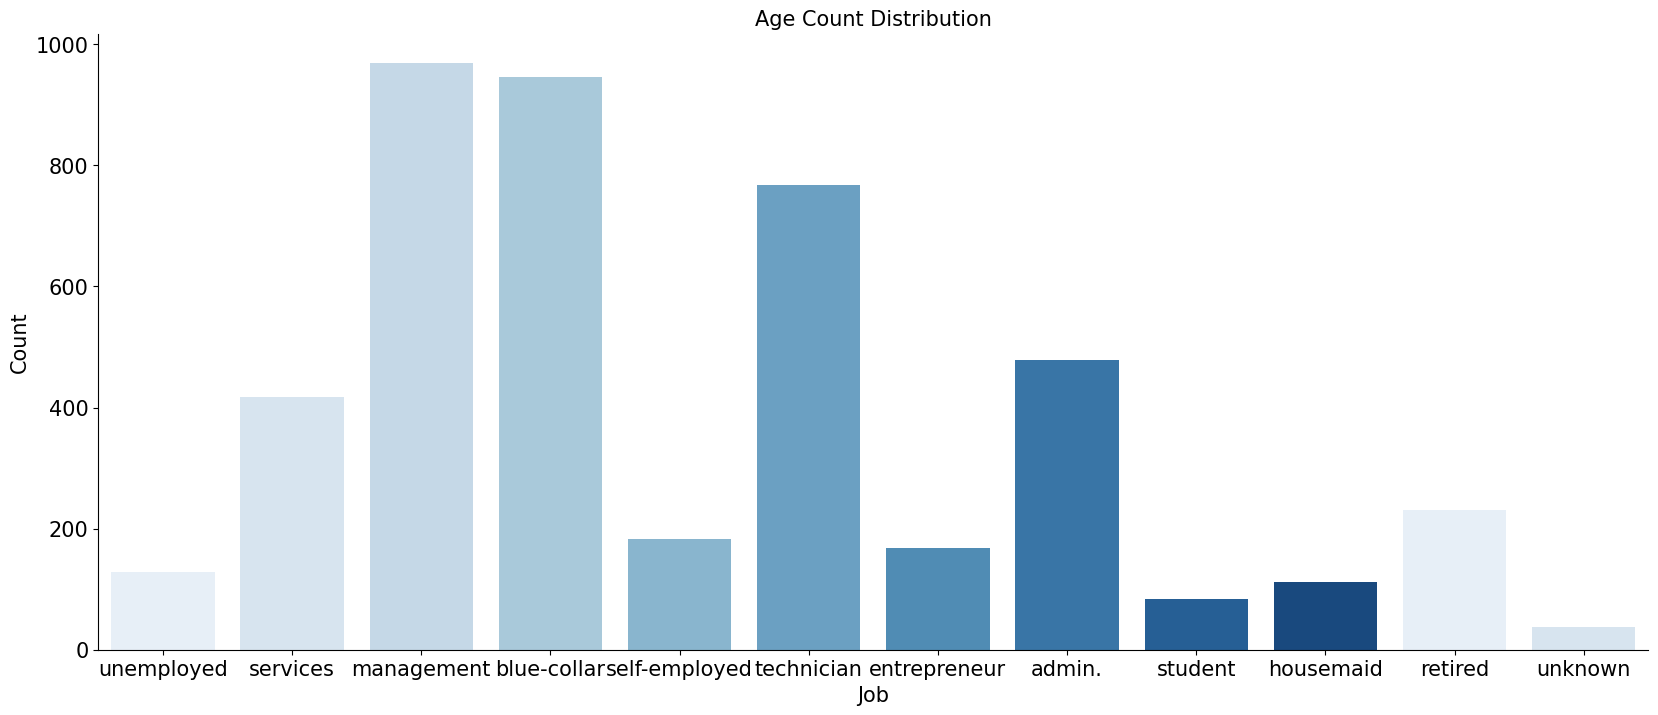

In [130]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client, palette=colors)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

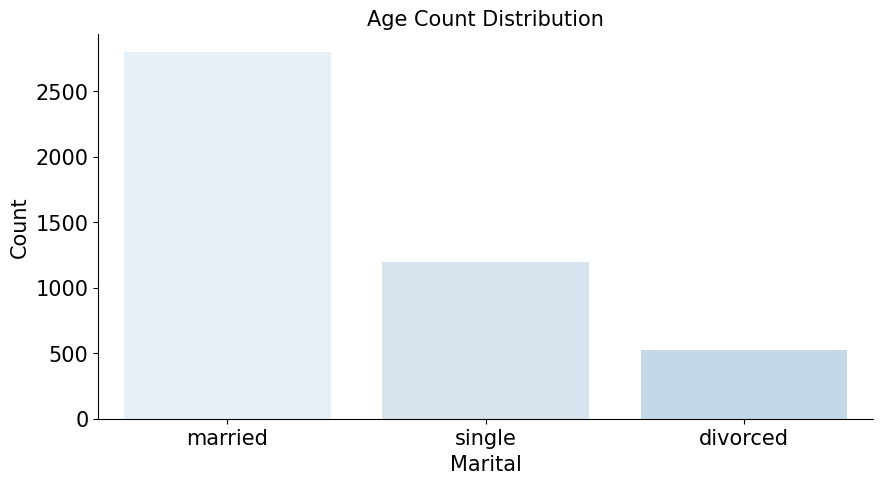

In [131]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client, palette=colors)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [115]:
# Pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [116]:
# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

In [117]:
# Preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [118]:
# Apply preprocessing to the dataset
X_processed = preprocessor.fit_transform(data.drop('y', axis=1))
y = data['y']

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Predictions
logistic_predictions = logistic_model.predict(X_test)

# Model evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_predictions))
print(classification_report(y_test, logistic_predictions))

Logistic Regression Accuracy: 0.901657458563536
              precision    recall  f1-score   support

          no       0.92      0.98      0.95       807
         yes       0.60      0.28      0.38        98

    accuracy                           0.90       905
   macro avg       0.76      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905



In [121]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Predictions
svm_predictions = svm_model.predict(X_test)

# Model evaluation
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

SVM Accuracy: 0.8939226519337017
              precision    recall  f1-score   support

          no       0.91      0.98      0.94       807
         yes       0.52      0.22      0.31        98

    accuracy                           0.89       905
   macro avg       0.72      0.60      0.63       905
weighted avg       0.87      0.89      0.87       905



In [82]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [83]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with encoded target variable
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print('Neural Network Test Accuracy:', test_acc)


Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9815 - loss: 0.0641 - val_accuracy: 0.8917 - val_loss: 0.3280
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9824 - loss: 0.0630 - val_accuracy: 0.9039 - val_loss: 0.3601
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9836 - loss: 0.0595 - val_accuracy: 0.8994 - val_loss: 0.3410
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9858 - loss: 0.0534 - val_accuracy: 0.8928 - val_loss: 0.3513
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0590 - val_accuracy: 0.9006 - val_loss: 0.3908
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.0521 - val_accuracy: 0.8961 - val_loss: 0.3732
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9869 - loss: 0.0461 - val_accuracy: 0.8906 - val_loss: 0.3855
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9871 - loss: 0.0483 - val_accuracy: 0.

In [84]:
import tensorflow as tf

# Define custom F1-score metric function as natural metric is not working
def f1_metric(y_true, y_pred):
    y_pred = tf.round(y_pred)
    y_true = tf.cast(y_true, tf.float32)  # Cast y_true to float32
    tp = tf.reduce_sum(y_true * y_pred)
    fp = tf.reduce_sum((1 - y_true) * y_pred)
    fn = tf.reduce_sum(y_true * (1 - y_pred))
    
    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())
    
    f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
    
    return f1

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), f1_metric])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model
test_loss, test_acc, test_precision, test_recall, test_f1_score = model.evaluate(X_test, y_test_encoded)
print('Neural Network Test Accuracy:', test_acc)
print('Neural Network Test Precision:', test_precision)
print('Neural Network Test Recall:', test_recall)
print('Neural Network Test F1-Score:', test_f1_score)


Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9877 - f1_metric: 0.1072 - loss: 0.0416 - precision_7: 0.9707 - recall_7: 0.9190 - val_accuracy: 0.9006 - val_f1_metric: 0.0732 - val_loss: 0.4356 - val_precision_7: 0.5690 - val_recall_7: 0.3367
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9906 - f1_metric: 0.1123 - loss: 0.0360 - precision_7: 0.9815 - recall_7: 0.9364 - val_accuracy: 0.9006 - val_f1_metric: 0.0802 - val_loss: 0.4511 - val_precision_7: 0.5588 - val_recall_7: 0.3878
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9917 - f1_metric: 0.1071 - loss: 0.0354 - precision_7: 0.9677 - recall_7: 0.9559 - val_accuracy: 0.8950 - val_f1_metric: 0.0856 - val_loss: 0.4472 - val_precision_7: 0.5200 - val_recall_7: 0.3980
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9913 - f1_metric: 0.1188 - loss: 0.0352 - precision_7: 0.9790 - recall_7: 0.9488 - val_accuracy: 0.8807 - val_f1_metric: 0.1016 - val_loss: 0.4692 -